# Vorhersage von Fahrzeugpreisen aus mehreren Merkmalen

## Aufgabe
Erstellen sie mit Hilfe linearer Regression ein Modell zur Vorhersage eines Fahrzeugpreises für einen Gebrauchtwagen. 

Beginnen Sie in dem Sie versuchen den Fahrzeugpreis auschließlich anhand der Laufleistung zu schätzen. Implementieren Sie zur Evaluierung des Models drei unterschiedliche Varianten:
1. Einfache Aufteilung in Trainings- und Testdatensatz
1. K-Fold-Crossvalidation ohne Verwendung der Funktion `cross_val_score()`
1. K-Fold-Crossvalidation unter Verwendung der Funktion `cross_val_score()`

Bestimmen Sie im nächsten Schritt eine sinnvolle Kombination an Merkmalen, die das Problem lösen. Welche Kombionation funktioniert am besten? Beschränken Sie sich auf numerische Werte und nutzen Sie zur Evaluierung K-Fold-Crossvalidation.

Hinweis: Visualisieren Sie den Score für die Kreuzvalidierungen jeweils mit Hilfe eines Box-Whiskers-Plot

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("DataSets/autos_prepared.csv")
#df = pd.read_csv("DataSets/autos.csv", encoding = "ISO-8859-1")
#df = pd.read_excel("DataSets/autos.xlsx")

In [8]:
df.head()

,price,yearOfRegistration,powerPS,kilometer,model,fuelType,name
0,1450,1997,75,90000,andere,benzin,Toyota_Toyota_Starlet_1._Hand__TÜV_neu
1,13100,2005,280,5000,golf,benzin,R32_tauschen_oder_kaufen
2,4500,2008,87,90000,yaris,benzin,Toyota_Yaris_1.3_VVT_i
3,6000,2009,177,125000,3er,diesel,320_Alpinweiss_Kohlenstoff
4,3990,1999,118,90000,3er,benzin,BMW_318i_E46_+++_1._Hand_+++_Liebhaberfahrzeug


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df[["kilometer"]].values
Y=df[["price"]].values
#1.:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=0, test_size=0.25)

model=LinearRegression()
model.fit(X_train,Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

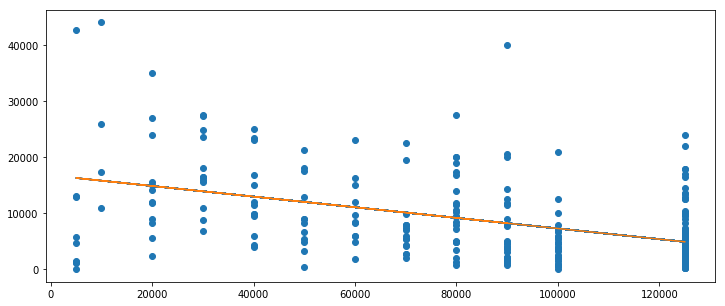

In [24]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 5)

plt.scatter(X,Y)
plt.plot(X_test,model.predict(X_test))
plt.plot(X_train,model.predict(X_train))
plt.show()



In [14]:
from sklearn import metrics
print(metrics.r2_score(Y_test,model.predict(X_test)))

0.295723820066934


In [19]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

kf=KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    print("train: " + str(train_index))
    print("test: " + str(test_index))
    X_test=X[test_index]
    X_train=X[train_index]
    
    Y_test=Y[test_index]
    Y_train=Y[train_index]
    
    model=LinearRegression()
    model.fit(X_train, Y_train)
    print(metrics.r2_score(Y_test,model.predict(X_test)))

train: [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249]
test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]
0.16629430172349768
train: [  0   1   2   3   4   5   6

In [21]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearRegression(),X,Y, cv=KFold(n_splits=3))

print(scores)
print(np.mean(scores))

[0.1662943  0.22305301 0.1483219 ]
0.17922306998448437


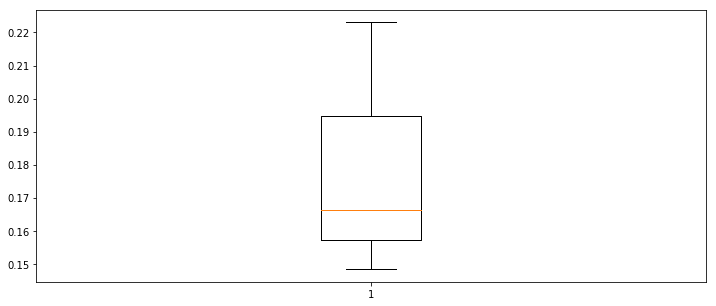

In [23]:
plt.boxplot(scores)
plt.show()